## @AnalyticalHarry

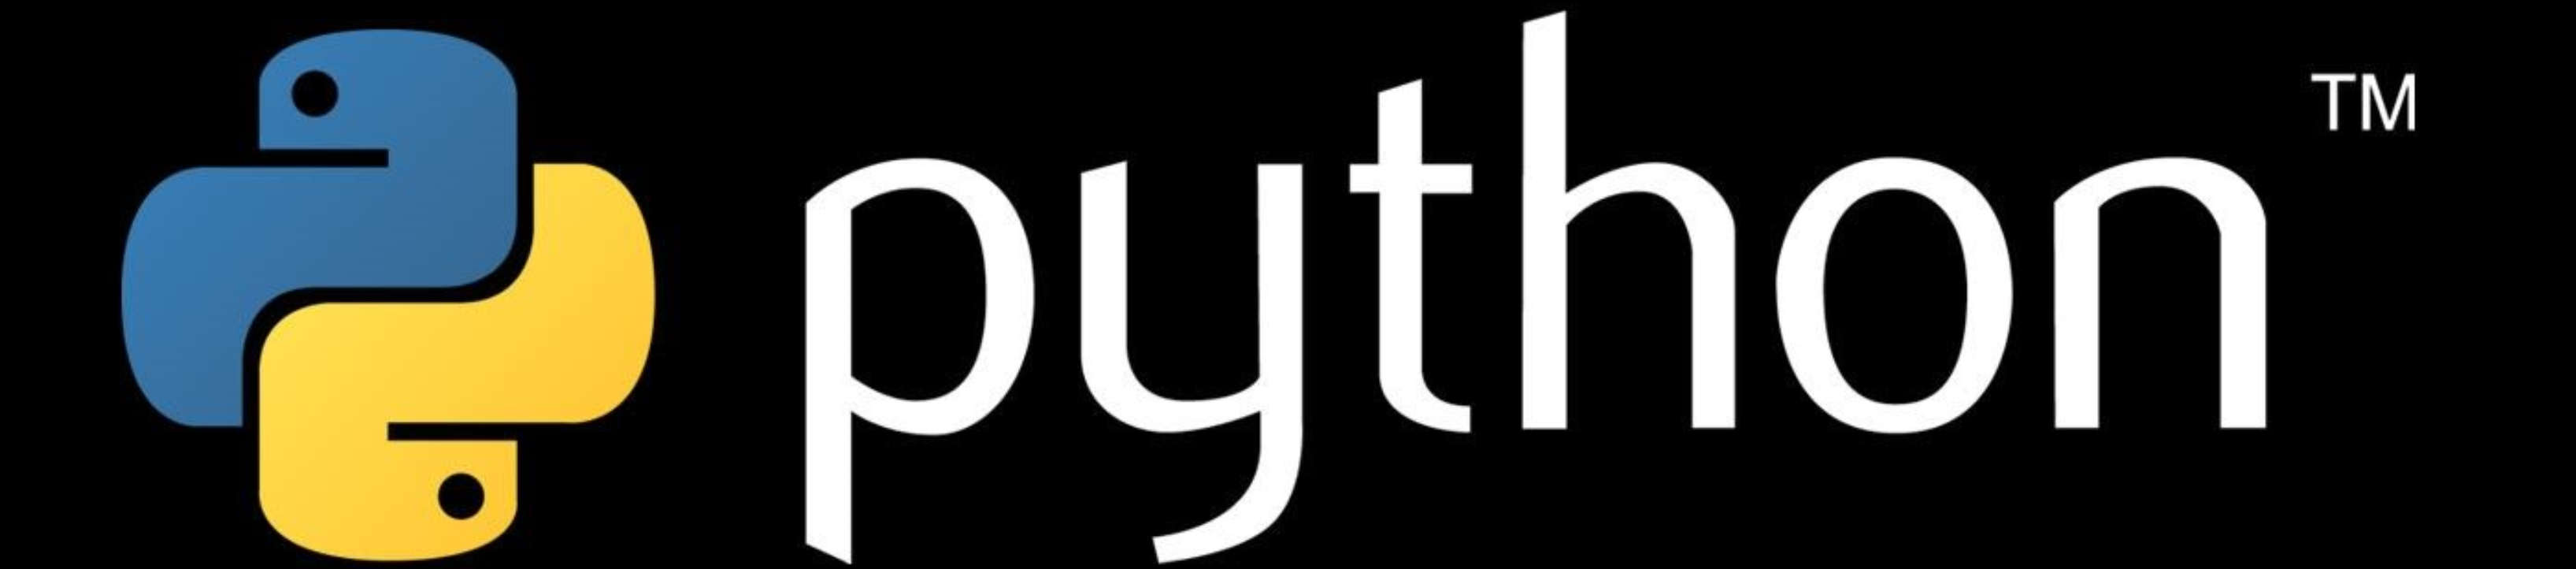
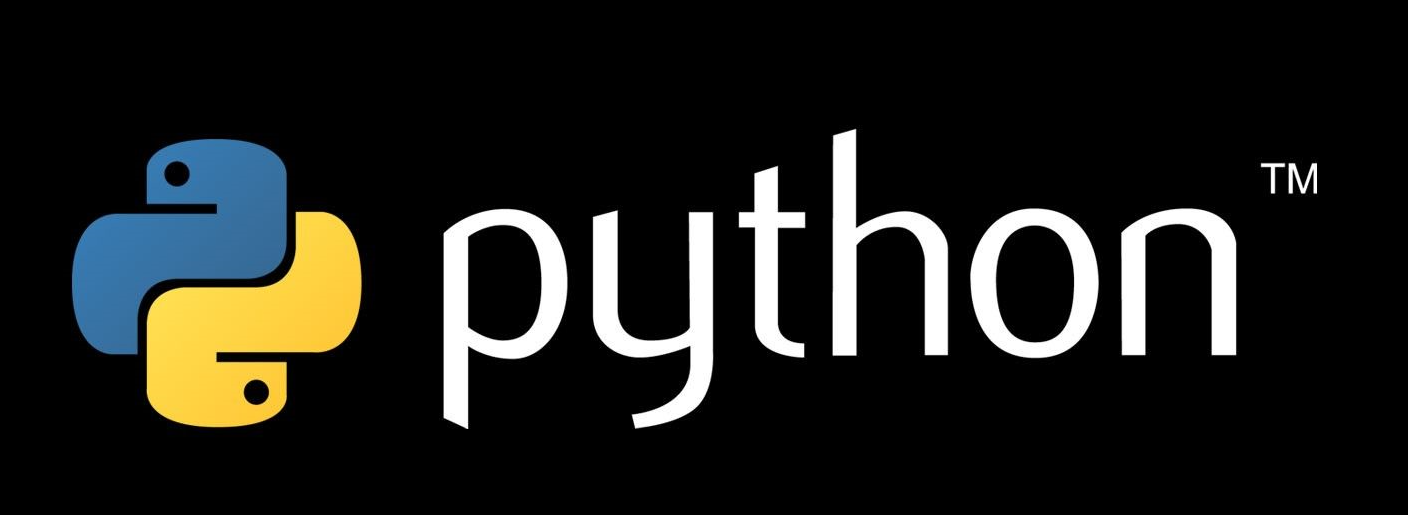

#### Hemant Thapa

### PORTFOLIO PERFORMANCE & INVESTMENT OPPORTUNITY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def calculate_profit(investment, intial_price, future_price):
    initial_value = investment/intial_price
    future_value = initial_value * future_price
    profit = future_value - investment
    return profit

In [52]:
def plot_profit_over_time(dates, profits):
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 6))
    plt.plot(dates, profits, linewidth=2, color="gold")
    plt.stackplot(dates, profits, linewidth=2, color="darkcyan")
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Profit', fontsize=18)
    plt.title('Profit Over Time')
    plt.grid(linestyle="--", color="white", alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()
    plt.close()

In [7]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN"]

In [46]:
allocation_ratio = [ 0.4, 0.3, 0.2, 0.1]

In [8]:
tickers

['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [9]:
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    history = stock.history(period="20y")
    data[ticker] = history

In [12]:
type(data)

dict

In [20]:
len(data['AAPL']['Close'])

5036

<AxesSubplot: xlabel='Date'>

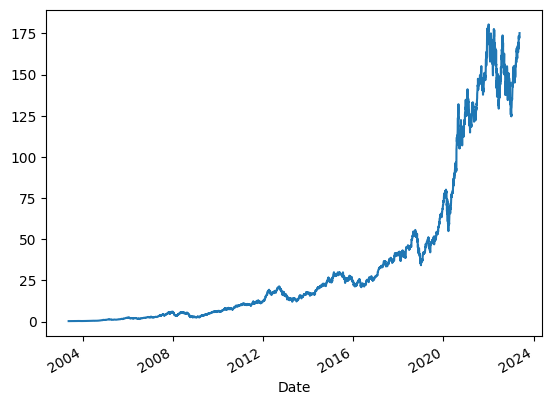

In [25]:
data['AAPL']['Close'].plot()

In [21]:
len(data['GOOGL']['Close'])

4721

<AxesSubplot: xlabel='Date'>

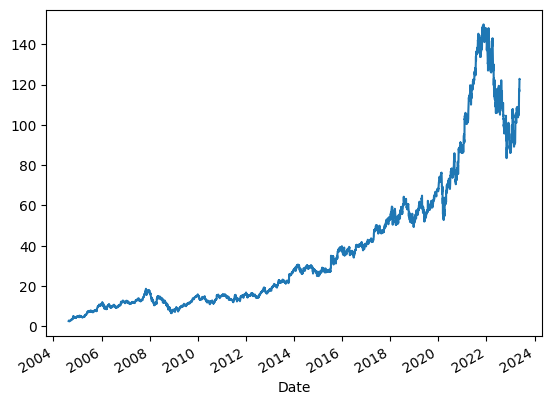

In [24]:
data['GOOGL']['Close'].plot()

In [30]:
GOOGLE = yf.Ticker("GOOGL")
GOOGLE = GOOGLE.history(period="20y")
GOOGLE.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0


In [22]:
len(data['MSFT']['Close'])

5036

In [23]:
len(data['AMZN']['Close'])

5036

In [31]:
total_investment = 10_000

In [32]:
total_investment

10000

In [35]:
initial_share_prices = {}
future_share_prices = {}
for ticker in tickers:
    prices = data[ticker]['Close']
    initial_share_prices[ticker] = prices.iloc[0]
    future_share_prices[ticker] = prices

In [37]:
initial_share_prices

{'AAPL': 0.27000898122787476,
 'GOOGL': 2.5110108852386475,
 'MSFT': 15.382394790649414,
 'AMZN': 1.5740000009536743}

In [38]:
future_share_prices

{'AAPL': Date
 2003-05-20 00:00:00-04:00      0.270009
 2003-05-21 00:00:00-04:00      0.270919
 2003-05-22 00:00:00-04:00      0.276838
 2003-05-23 00:00:00-04:00      0.278053
 2003-05-27 00:00:00-04:00      0.286552
                                 ...    
 2023-05-15 00:00:00-04:00    172.070007
 2023-05-16 00:00:00-04:00    172.070007
 2023-05-17 00:00:00-04:00    172.690002
 2023-05-18 00:00:00-04:00    175.050003
 2023-05-19 00:00:00-04:00    175.160004
 Name: Close, Length: 5036, dtype: float64,
 'GOOGL': Date
 2004-08-19 00:00:00-04:00      2.511011
 2004-08-20 00:00:00-04:00      2.710460
 2004-08-23 00:00:00-04:00      2.737738
 2004-08-24 00:00:00-04:00      2.624374
 2004-08-25 00:00:00-04:00      2.652653
                                 ...    
 2023-05-15 00:00:00-04:00    116.510002
 2023-05-16 00:00:00-04:00    119.510002
 2023-05-17 00:00:00-04:00    120.839996
 2023-05-18 00:00:00-04:00    122.830002
 2023-05-19 00:00:00-04:00    122.760002
 Name: Close, Length: 472

In [54]:
tickers

['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [45]:
allocation_ratio = [ 0.4, 0.3, 0.2, 0.1]

In [55]:
0.4*10000

4000.0

In [50]:
profits = {}
for ticker in tickers:
    profits[ticker] = []
    for price in future_share_prices[ticker]:
        profit = calculate_profit(total_investment * allocation_ratio[tickers.index(ticker)], initial_share_prices[ticker], price)
        profits[ticker].append(profit)

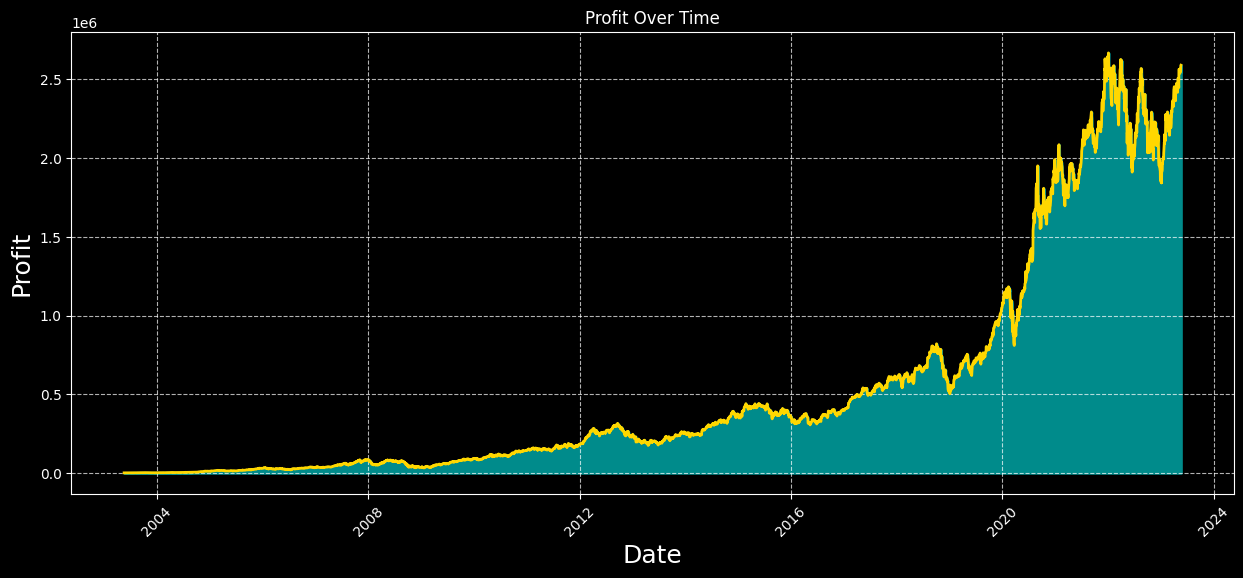

Profit over time for AAPL
Investment Amount:  4000.0
Profit/Loss:  2590876.7017387864



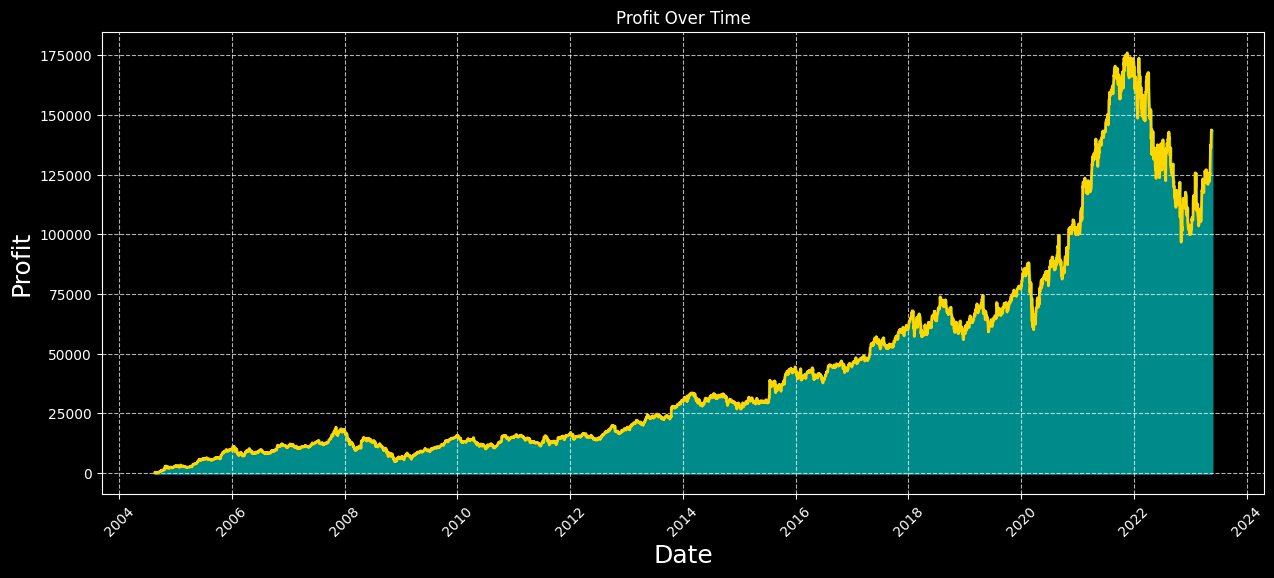

Profit over time for GOOGL
Investment Amount:  3000.0
Profit/Loss:  143666.03341852498



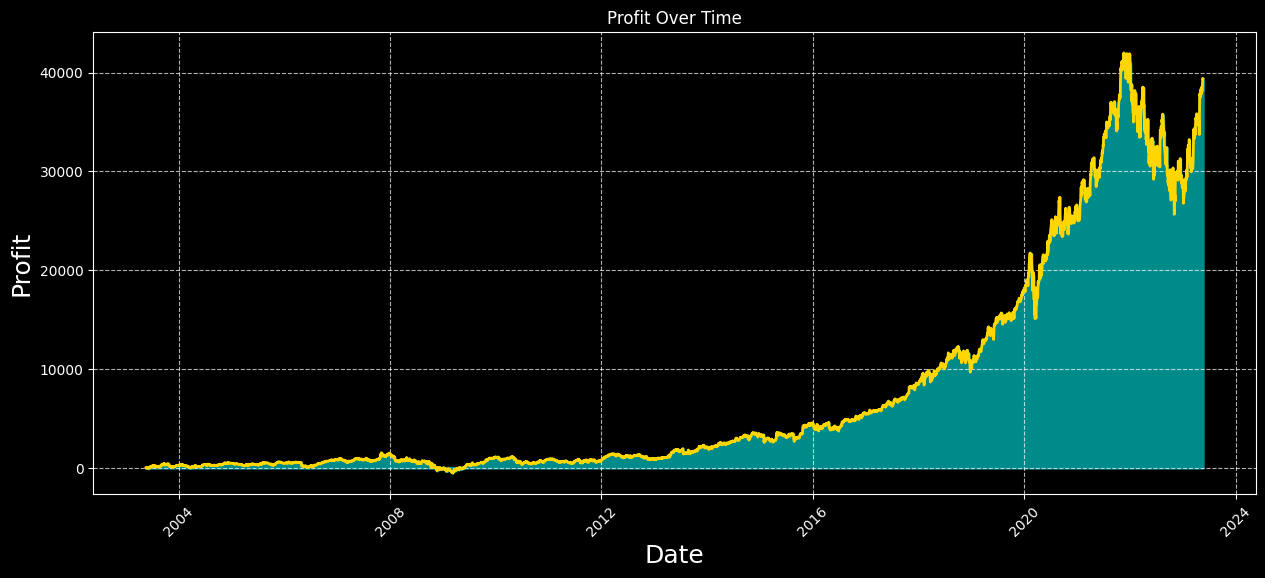

Profit over time for MSFT
Investment Amount:  2000.0
Profit/Loss:  39390.173723977205



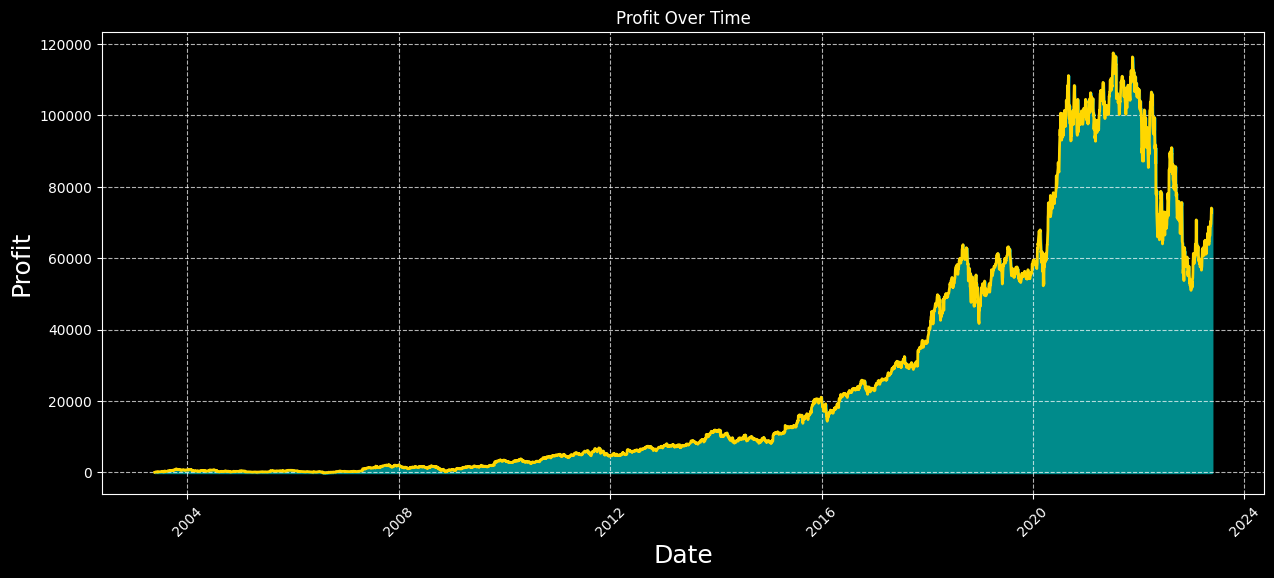

Profit over time for AMZN
Investment Amount:  1000.0
Profit/Loss:  72856.41672780497



In [53]:
for ticker in tickers:
    plot_profit_over_time(data[ticker].index, profits[ticker])
    print(f"Profit over time for {ticker}")
    print("Investment Amount: ", total_investment * allocation_ratio[tickers.index(ticker)])
    print("Profit/Loss: ", profits[ticker][-1])
    print()

In [56]:
final_profit = sum([profits[ticker][-1] for ticker in tickers])

In [57]:
final_profit

2846789.3256090935

In [58]:
final_investment_worth = total_investment + final_profit

In [59]:
final_investment_worth

2856789.3256090935

In [60]:
percentage_change = (final_profit/ total_investment) * 100

In [63]:
print(f"percentage change: {round(percentage_change,2)} %")

percentage change: 28467.89 %


In [64]:
panel = {'Inital Investment':total_investment, 'Final Investment Worth':final_investment_worth}
index = [0]
panel_df = pd.DataFrame(panel, index=index)

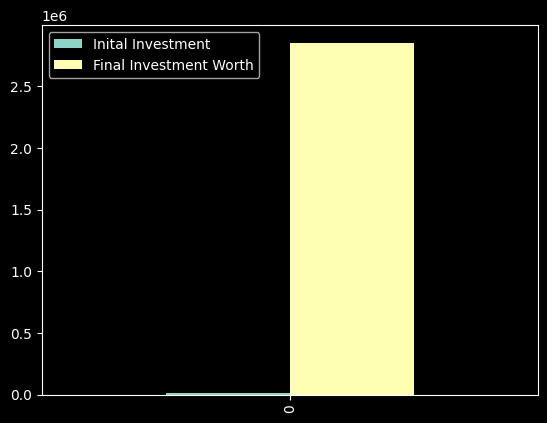

In [65]:
panel_df.plot.bar()
plt.show()